In [1]:
import numpy as np
import itertools
import math
import scipy
from scipy import spatial
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.patches as patches
from matplotlib import animation
from matplotlib import transforms
from mpl_toolkits.axes_grid1 import make_axes_locatable
import xarray as xr
import dask
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import pandas as pd
import netCDF4
import matplotlib.image as imag
from sklearn.cluster import MiniBatchKMeans
from sklearn.decomposition import PCA,IncrementalPCA
from yellowbrick.cluster import KElbowVisualizer
from matplotlib import ticker
import cartopy
import cartopy.feature as cfeature
import cartopy.crs as ccrs
from mpl_toolkits.basemap import Basemap
from statistics import mode
from scipy.ndimage.filters import uniform_filter1d
from sklearn.utils import shuffle
from scipy.stats import norm
from mpl_toolkits.mplot3d import Axes3D


import mpl_scatter_density # adds projection='scatter_density'
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.colors import Normalize 
from scipy.interpolate import interpn
from matplotlib.colors import LogNorm

import matplotlib.cm as cm
import warnings
warnings.filterwarnings("ignore")
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')

/export/home/gmooers/miniconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
def plot_generator_paper(sample, X, Z):
    
    fz = 15*1.25
    lw = 4
    siz = 100
    XNNA = 1.25 # Abscissa where architecture-constrained network will be placed
    XTEXT = 0.25 # Text placement
    YTEXT = 0.3 # Text placement
    
    plt.rc('text', usetex=False)
    matplotlib.rcParams['mathtext.fontset'] = 'stix'
    matplotlib.rcParams['font.family'] = 'STIXGeneral'
    #mpl.rcParams["font.serif"] = "STIX"
    plt.rc('font', family='serif', size=fz)
    matplotlib.rcParams['lines.linewidth'] = lw
    
    
    cmap="RdBu_r"
    fig, ax = plt.subplots(1,1, figsize=(15,6))
    cs0 = ax.pcolor(X, Z, sample, cmap=cmap, vmin=-1.0, vmax = 1.0)
    ax.set_title("Anomalous Vertical Velocity Field Detected By ELBO")
    ax.set_ylim(ax.get_ylim()[::-1])
    ax.set_xlabel("CRMs", fontsize=fz*1.5)
    ax.xaxis.set_label_coords(0.54,-0.05)
    h = ax.set_ylabel("hPa", fontsize = fz*1.5)
    h.set_rotation(0)
    ax.yaxis.set_label_coords(-0.10,0.44)
    #y_ticks = np.arange(1350, 0, -350)
    #ax.set_yticklabels(y_ticks, fontsize=fz*1.33)
    ax.tick_params(axis='x', labelsize=fz*1.33)
    ax.tick_params(axis='y', labelsize=fz*1.33)
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    cbar = fig.colorbar(cs0, cax=cax)
    cbar.set_label(label=r'$\left(\mathrm{m\ s^{-1}}\right)$', rotation="horizontal", fontsize=fz*1.5, labelpad=30, y = 0.65)
    plt.show()
    #plt.savefig("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/CI_Figure_Data/Anomaly.pdf")
    
#plot_generator(test[0,:,:])

In [3]:
fz = 15*1.5
lw = 4
siz = 100
XNNA = 1.25 # Abscissa where architecture-constrained network will be placed
XTEXT = 0.25 # Text placement
YTEXT = 0.3 # Text placement

plt.rc('text', usetex=False)
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
#mpl.rcParams["font.serif"] = "STIX"
plt.rc('font', family='serif', size=fz)
matplotlib.rcParams['lines.linewidth'] = lw

In [4]:
others = netCDF4.Dataset("/fast/gmooers/Raw_Data/extras/TimestepOutput_Neuralnet_SPCAM_216.cam.h1.2009-01-01-00000.nc")
levs = np.array(others.variables['lev'])
lons = np.array(others.variables['lon'])
new = np.flip(levs)
crms = np.arange(1,129,1)
Xs, Zs = np.meshgrid(crms, new)

In [5]:
! ls /fast/gmooers/Preprocessed_Data/Single_Amazon_Unaveraged/

atlantic_test_day.npy	      w_var_all_sc_point.npy
atlantic_test_synoptic.npy    w_var_all_warm_pool_point.npy
atlantic_test_week.npy	      w_var_atlantic_test_day.npy
synoptic_amazon_point.npy     w_var_atlantic_test_synoptic.npy
synoptic_desert_point.npy     w_var_atlantic_test_week.npy
synoptic_sc_point.npy	      w_var_synoptic_amazon_point.npy
synoptic_warm_pool_point.npy  w_var_synoptic_desert_point.npy
test_amazon_all.npy	      w_var_synoptic_sc_point.npy
test_atlantic_all.npy	      w_var_synoptic_warm_pool_point.npy
test_day.npy		      w_var_test_amazon_all.npy
test_synoptic.npy	      w_var_test_atlantic_all.npy
test_week.npy		      w_var_test_day.npy
w_var_all_amazon_point.npy    w_var_test_synoptic.npy
w_var_all_desert_point.npy    w_var_test_week.npy


In [6]:
amazon_z_test_tsne = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/Latant_Space_Constrained_VAEs/model_graphs/latant_space/Full_3_Months_Amazon_2D_PCA_Latent_Space__369.npy")
sc_z_test_tsne = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/Latant_Space_Constrained_VAEs/model_graphs/latant_space/Full_3_Months_Desert_2D_PCA_Latent_Space__369.npy")
desert_z_test_tsne = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/Latant_Space_Constrained_VAEs/model_graphs/latant_space/Full_3_Months_SC_2D_PCA_Latent_Space__369.npy")
warm_pool_z_test_tsne = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/Latant_Space_Constrained_VAEs/model_graphs/latant_space/Full_3_Months_Warm_Pool_2D_PCA_Latent_Space__369.npy")

Amazon_Test_Images = np.load("/fast/gmooers/Preprocessed_Data/Single_Amazon_Unaveraged/w_var_all_amazon_point.npy")
Desert_Test_Images = np.load("/fast/gmooers/Preprocessed_Data/Single_Amazon_Unaveraged/w_var_all_sc_point.npy")
SC_Test_Images = np.load("/fast/gmooers/Preprocessed_Data/Single_Amazon_Unaveraged/w_var_all_desert_point.npy")
Warm_Pool_Test_Images = np.load("/fast/gmooers/Preprocessed_Data/Single_Amazon_Unaveraged/w_var_all_warm_pool_point.npy")

Max_Scalar = np.load("/fast/gmooers/Preprocessed_Data/W_Variable/Space_Time_Max_Scalar.npy")
Min_Scalar = np.load("/fast/gmooers/Preprocessed_Data/W_Variable/Space_Time_Min_Scalar.npy")

Amazon_Test_Images = np.interp(Amazon_Test_Images, (0, 1), (Min_Scalar, Max_Scalar))
Desert_Test_Images = np.interp(Desert_Test_Images, (0, 1), (Min_Scalar, Max_Scalar))
SC_Test_Images = np.interp(SC_Test_Images, (0, 1), (Min_Scalar, Max_Scalar))
Warm_Pool_Test_Images = np.interp(Warm_Pool_Test_Images, (0, 1), (Min_Scalar, Max_Scalar))

(-80, 80)

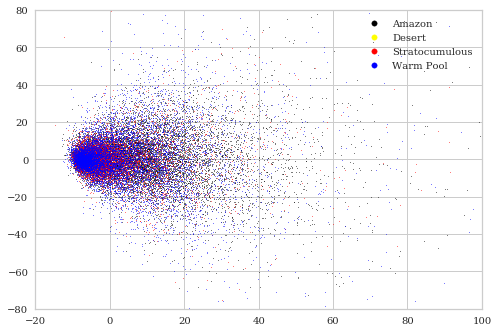

In [9]:
plt.scatter(x=amazon_z_test_tsne[:, 0], y=amazon_z_test_tsne[:, 1], c="black", s=0.2, label = "Amazon")
plt.scatter(x=desert_z_test_tsne[:, 0], y=desert_z_test_tsne[:, 1], c="yellow", s=0.2, label = "Desert")
plt.scatter(x=sc_z_test_tsne[:, 0], y=sc_z_test_tsne[:, 1], c="red", s=0.2, label = "Stratocumulous")
plt.scatter(x=warm_pool_z_test_tsne[:, 0], y=warm_pool_z_test_tsne[:, 1], c="blue", s=0.2, label = "Warm Pool")
lgnd = plt.legend()

lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]
lgnd.legendHandles[3]._sizes = [30]

plt.xlim(-20, 100)
plt.ylim(-80,80)

In [50]:
sc_labels = np.empty(shape=(len(sc_z_test_tsne)))
amazon_labels = np.empty(shape=(len(amazon_z_test_tsne)))
desert_labels = np.empty(shape=(len(desert_z_test_tsne)))
warm_pool_labels = np.empty(shape=(len(warm_pool_z_test_tsne)))

In [51]:
count = 0
for i in range(24):
    for j in range(4):
        sc_labels[count::96] = i
        amazon_labels[count::96] = i
        desert_labels[count::96] = i
        warm_pool_labels[count::96] = i
        count = count+1

0
1000
2000
3000
4000
5000
6000
7000
8000
9000


Text(0.5, 1.0, 'Latent Space Single Amazon Location over Winter by LST Hour')

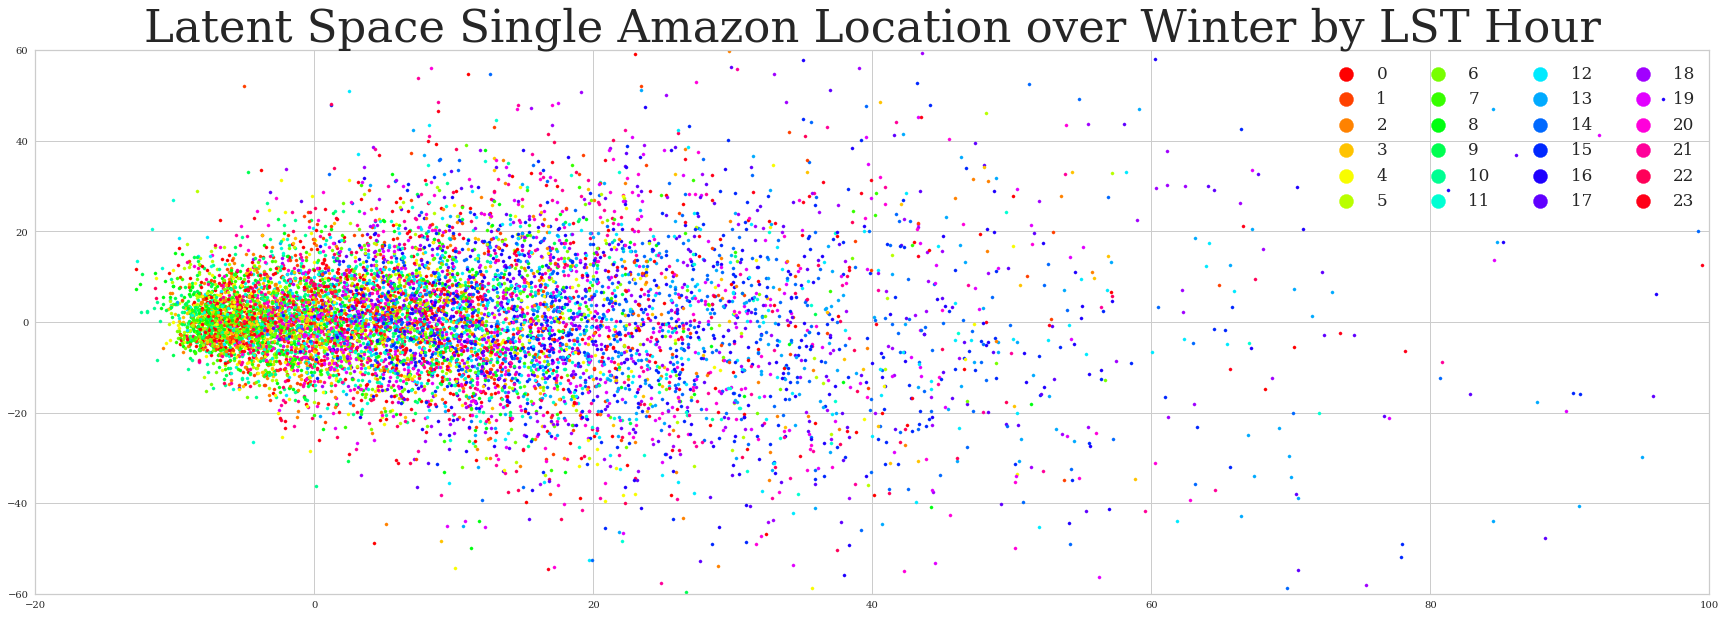

In [52]:
colors = cm.hsv(np.linspace(0, 1, 24))
fig, ax = plt.subplots(figsize=(30, 10))
ax.set_xlim(-20, 100)
ax.set_ylim(-60,60)
obs = []
for i in range(len(amazon_z_test_tsne)):
    if i %1000 == 0:
        print(i)
    if int(amazon_labels[i]) not in obs:
        obs.append(int(amazon_labels[i]))
        ax.scatter(x=amazon_z_test_tsne[i, 0], y=amazon_z_test_tsne[i, 1], c=colors[int(amazon_labels[i])], s=10.0, label = str(int(amazon_labels[i])))
    else:
        ax.scatter(x=amazon_z_test_tsne[i, 0], y=amazon_z_test_tsne[i, 1], c=colors[int(amazon_labels[i])], s=10.0)
        

lgnd = ax.legend(loc="best", ncol=4, fontsize=fz*0.75)
for handle in lgnd.legendHandles:
    handle.set_sizes([200.0])
    
    

ax.set_title("Latent Space Single Amazon Location over Winter by LST Hour", fontsize=fz*2)

(-60, 60)

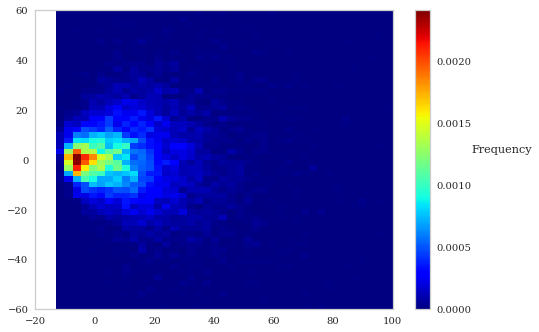

In [53]:
fig, ax = plt.subplots()    
cb = ax.hist2d(amazon_z_test_tsne[:,0], amazon_z_test_tsne[:,1], bins=(100, 100), cmap=plt.cm.jet, density=True)
cbar = fig.colorbar(cb[3], ax=ax)
cbar.set_label(label="Frequency", rotation="horizontal", fontsize=fz*0.5, labelpad=30, y = 0.55)
ax.set_xlim(-20, 100)
ax.set_ylim(-60,60)

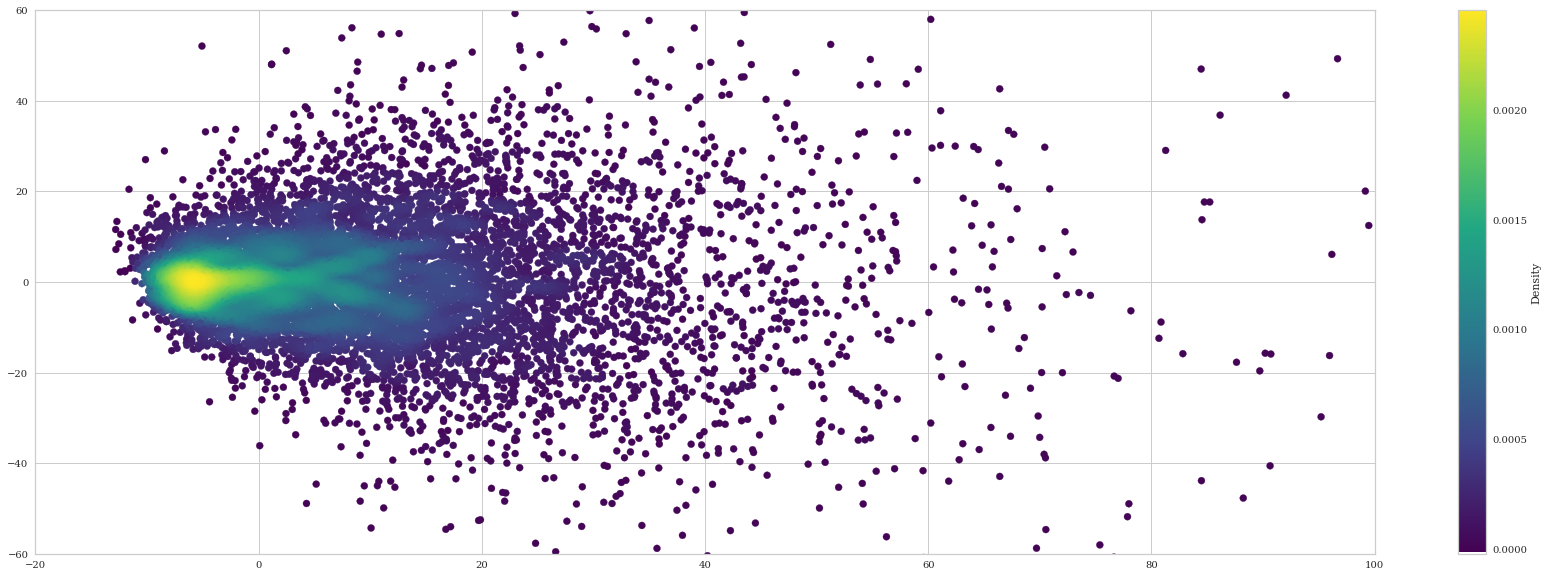

In [54]:
white_viridis = LinearSegmentedColormap.from_list('white_viridis', [
    (0, '#ffffff'),
    (1e-20, '#440053'),
    (0.2, '#404388'),
    (0.4, '#2a788e'),
    (0.6, '#21a784'),
    (0.8, '#78d151'),
    (1, '#fde624'),
], N=256)

x = amazon_z_test_tsne[:,0]
y = amazon_z_test_tsne[:,1]
fig, ax = plt.subplots(figsize=(30,10)) 
data , x_e, y_e = np.histogram2d( x, y, bins = [100,100],  density=True)
z = interpn( ( 0.5*(x_e[1:] + x_e[:-1]) , 0.5*(y_e[1:]+y_e[:-1]) ) , data , np.vstack([x,y]).T , method = "splinef2d", bounds_error = False)

#To be sure to plot all data
z[np.where(np.isnan(z))] = 0.0

# Sort the points by density, so that the densest points are plotted last

idx = z.argsort()
x, y, z = x[idx], y[idx], z[idx]

ax.scatter( x, y, c=z, cmap=white_viridis)
ax.set_xlim(-20, 100)
ax.set_ylim(-60,60)
norm = Normalize(vmin = np.min(z), vmax = np.max(z))
cbar = fig.colorbar(cm.ScalarMappable(norm = norm, cmap = white_viridis), ax=ax)
cbar.ax.set_ylabel('Density')
print(" ")

0
1000
2000
3000
4000
5000
6000
7000
8000
9000


Text(0.5, 1.0, 'Latent Space Single Strato-cumulous Location over Winter by LST Hour')

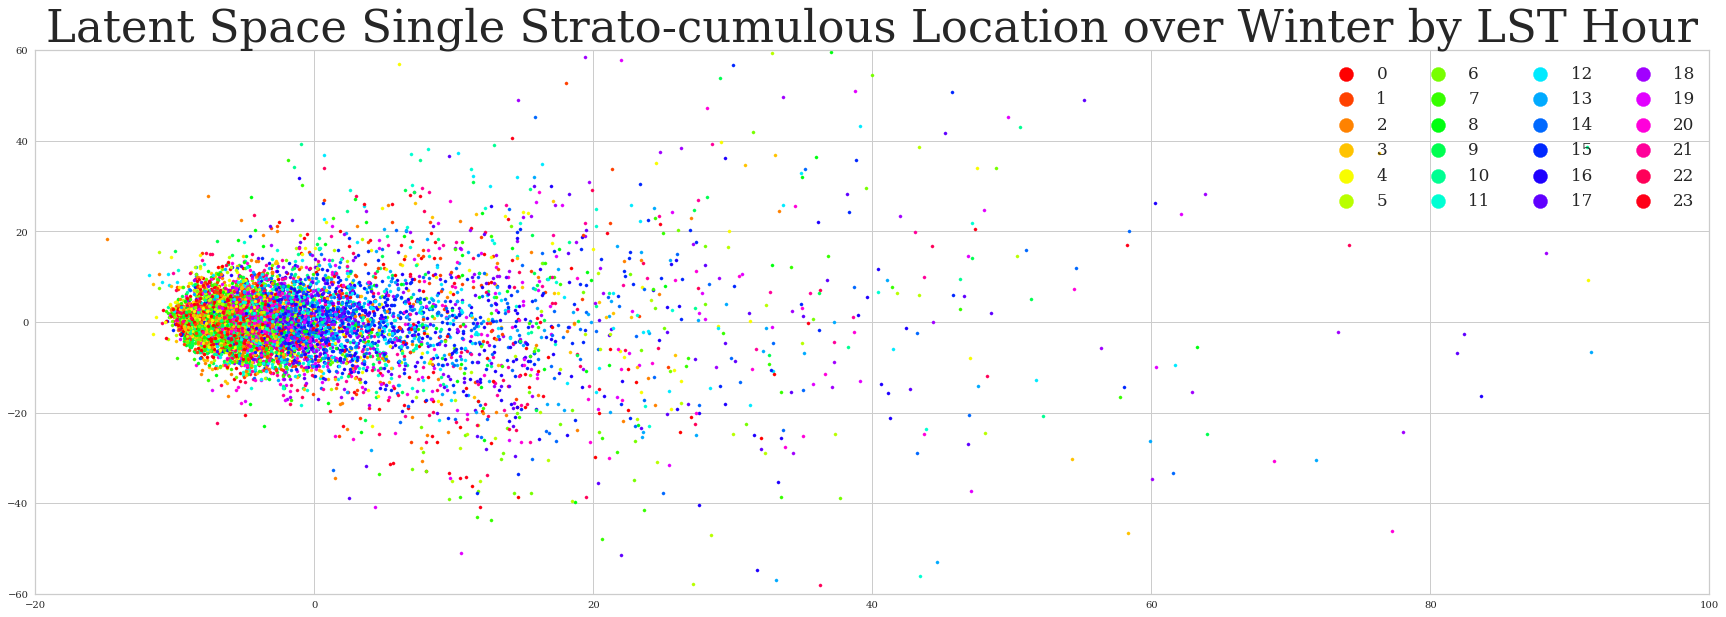

In [55]:
colors = cm.hsv(np.linspace(0, 1, 24))
fig, ax = plt.subplots(figsize=(30, 10))
ax.set_xlim(-30, 100)
ax.set_ylim(-60,60)
obs = []
for i in range(len(sc_z_test_tsne)):
    if i %1000 == 0:
        print(i)
    if int(sc_labels[i]) not in obs:
        obs.append(int(sc_labels[i]))
        ax.scatter(x=sc_z_test_tsne[i, 0], y=sc_z_test_tsne[i, 1], c=colors[int(sc_labels[i])], s=10.0, label = str(int(sc_labels[i])))
    else:
        ax.scatter(x=sc_z_test_tsne[i, 0], y=sc_z_test_tsne[i, 1], c=colors[int(sc_labels[i])], s=10.0)
        

lgnd = ax.legend(loc="best", ncol=4, fontsize=fz*0.75)
for handle in lgnd.legendHandles:
    handle.set_sizes([200.0])
    
    
ax.set_xlim(-20, 100)
ax.set_ylim(-60,60)
ax.set_title("Latent Space Single Strato-cumulous Location over Winter by LST Hour", fontsize=fz*2)

(-60, 60)

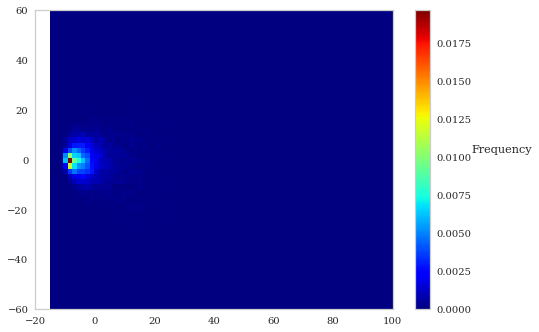

In [56]:
fig, ax = plt.subplots()    
cb = ax.hist2d(sc_z_test_tsne[:,0], sc_z_test_tsne[:,1], bins=(100, 100), cmap=plt.cm.jet, density=True)
cbar = fig.colorbar(cb[3], ax=ax)
cbar.set_label(label="Frequency", rotation="horizontal", fontsize=fz*0.5, labelpad=30, y = 0.55)
ax.set_xlim(-20, 100)
ax.set_ylim(-60,60)

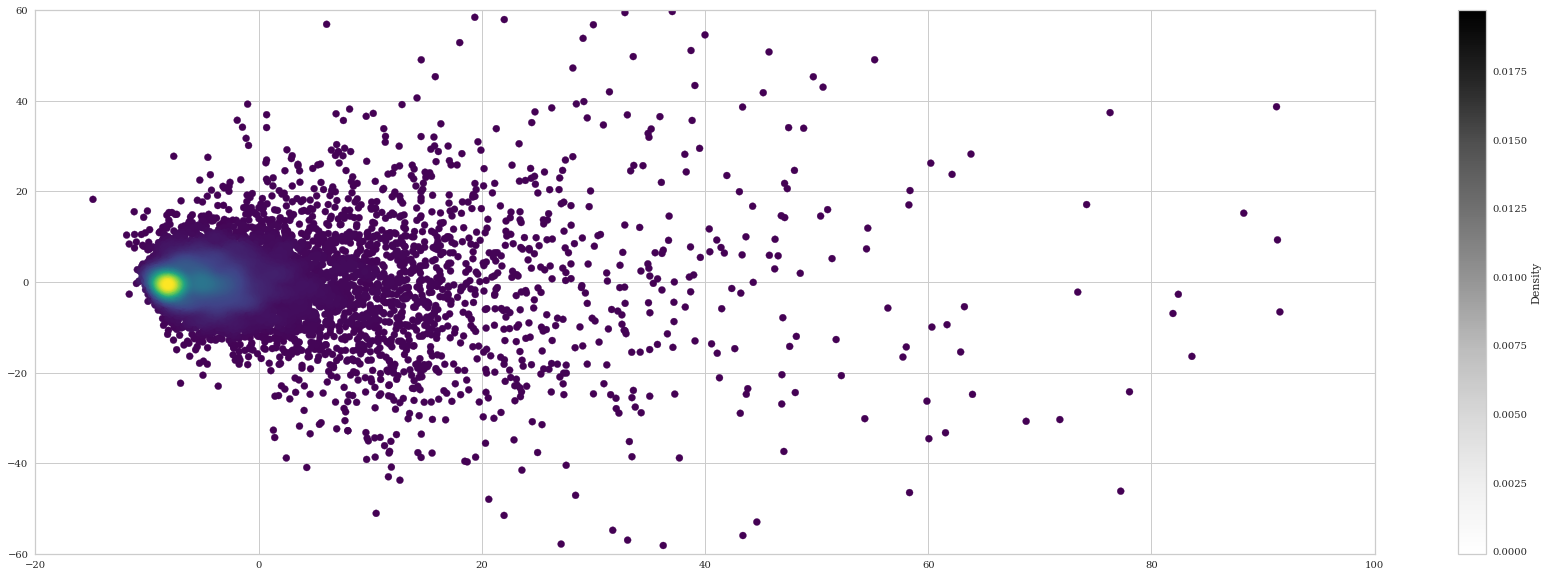

In [57]:
x = sc_z_test_tsne[:,0]
y = sc_z_test_tsne[:,1]
fig, ax = plt.subplots(figsize=(30,10)) 
data , x_e, y_e = np.histogram2d( x, y, bins = [100,100],  density=True)
z = interpn( ( 0.5*(x_e[1:] + x_e[:-1]) , 0.5*(y_e[1:]+y_e[:-1]) ) , data , np.vstack([x,y]).T , method = "splinef2d", bounds_error = False)

#To be sure to plot all data
z[np.where(np.isnan(z))] = 0.0

# Sort the points by density, so that the densest points are plotted last

idx = z.argsort()
x, y, z = x[idx], y[idx], z[idx]

ax.scatter( x, y, c=z, cmap=white_viridis)
ax.set_xlim(-20, 100)
ax.set_ylim(-60,60)
norm = Normalize(vmin = np.min(z), vmax = np.max(z))
cbar = fig.colorbar(cm.ScalarMappable(norm = norm), ax=ax, cmap=white_viridis)
cbar.ax.set_ylabel('Density')
print(" ")

0
1000
2000
3000
4000
5000
6000
7000
8000
9000


Text(0.5, 1.0, 'Latent Space Single Desert Location over Winter by LST Hour')

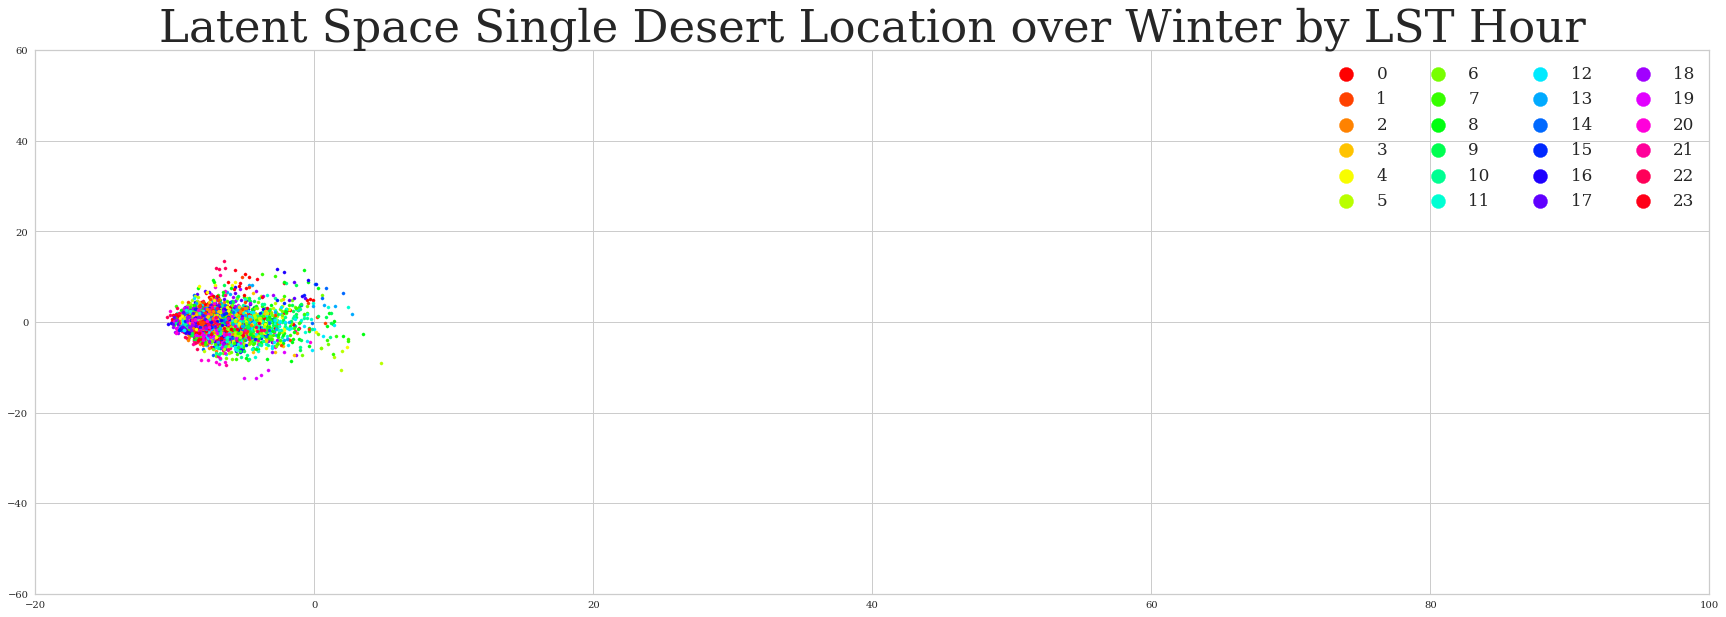

In [58]:
colors = cm.hsv(np.linspace(0, 1, 24))
fig, ax = plt.subplots(figsize=(30, 10))
ax.set_xlim(-30, 100)
ax.set_ylim(-60,60)
obs = []
for i in range(len(desert_z_test_tsne)):
    if i %1000 == 0:
        print(i)
    if int(desert_labels[i]) not in obs:
        obs.append(int(desert_labels[i]))
        ax.scatter(x=desert_z_test_tsne[i, 0], y=desert_z_test_tsne[i, 1], c=colors[int(desert_labels[i])], s=10.0, label = str(int(desert_labels[i])))
    else:
        ax.scatter(x=desert_z_test_tsne[i, 0], y=desert_z_test_tsne[i, 1], c=colors[int(desert_labels[i])], s=10.0)
        

lgnd = ax.legend(loc="best", ncol=4, fontsize=fz*0.75)
for handle in lgnd.legendHandles:
    handle.set_sizes([200.0])
    
    
ax.set_xlim(-20, 100)
ax.set_ylim(-60,60)
ax.set_title("Latent Space Single Desert Location over Winter by LST Hour", fontsize=fz*2)

(-60, 60)

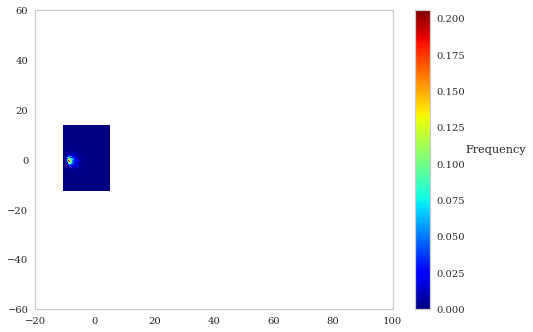

In [59]:
fig, ax = plt.subplots()    
cb = ax.hist2d(desert_z_test_tsne[:,0], desert_z_test_tsne[:,1], bins=(100, 100), cmap=plt.cm.jet, density=True)
cbar = fig.colorbar(cb[3], ax=ax)
cbar.set_label(label="Frequency", rotation="horizontal", fontsize=fz*0.5, labelpad=30, y = 0.55)
ax.set_xlim(-20, 100)
ax.set_ylim(-60,60)

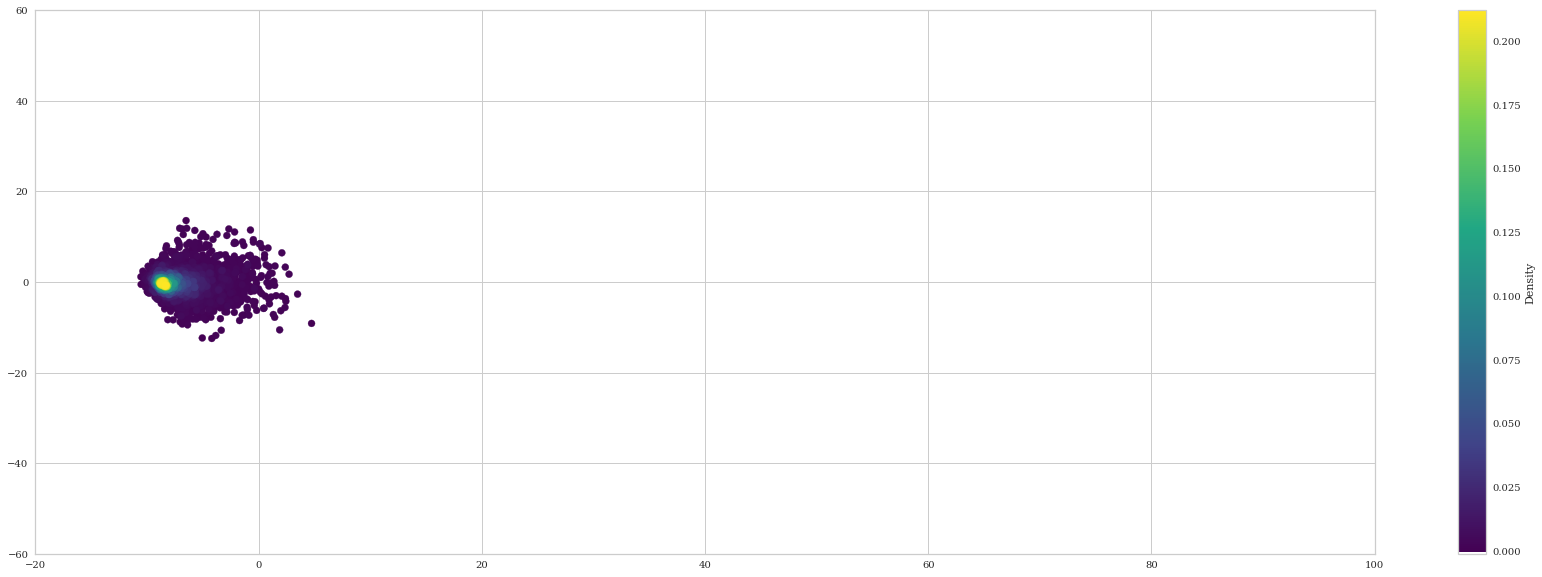

In [60]:
x = desert_z_test_tsne[:,0]
y = desert_z_test_tsne[:,1]
fig, ax = plt.subplots(figsize=(30,10)) 
data , x_e, y_e = np.histogram2d( x, y, bins = [100,100],  density=True)
z = interpn( ( 0.5*(x_e[1:] + x_e[:-1]) , 0.5*(y_e[1:]+y_e[:-1]) ) , data , np.vstack([x,y]).T , method = "splinef2d", bounds_error = False)

#To be sure to plot all data
z[np.where(np.isnan(z))] = 0.0

# Sort the points by density, so that the densest points are plotted last

idx = z.argsort()
x, y, z = x[idx], y[idx], z[idx]

ax.scatter( x, y, c=z, cmap=white_viridis)
ax.set_xlim(-20, 100)
ax.set_ylim(-60,60)
norm = Normalize(vmin = np.min(z), vmax = np.max(z))
cbar = fig.colorbar(cm.ScalarMappable(norm = norm, cmap=white_viridis), ax=ax)
cbar.ax.set_ylabel('Density')
print(" ")

0
1000
2000
3000
4000
5000
6000
7000
8000
9000


Text(0.5, 1.0, 'Latent Space Single Warm Pool Location over Winter by LST Hour')

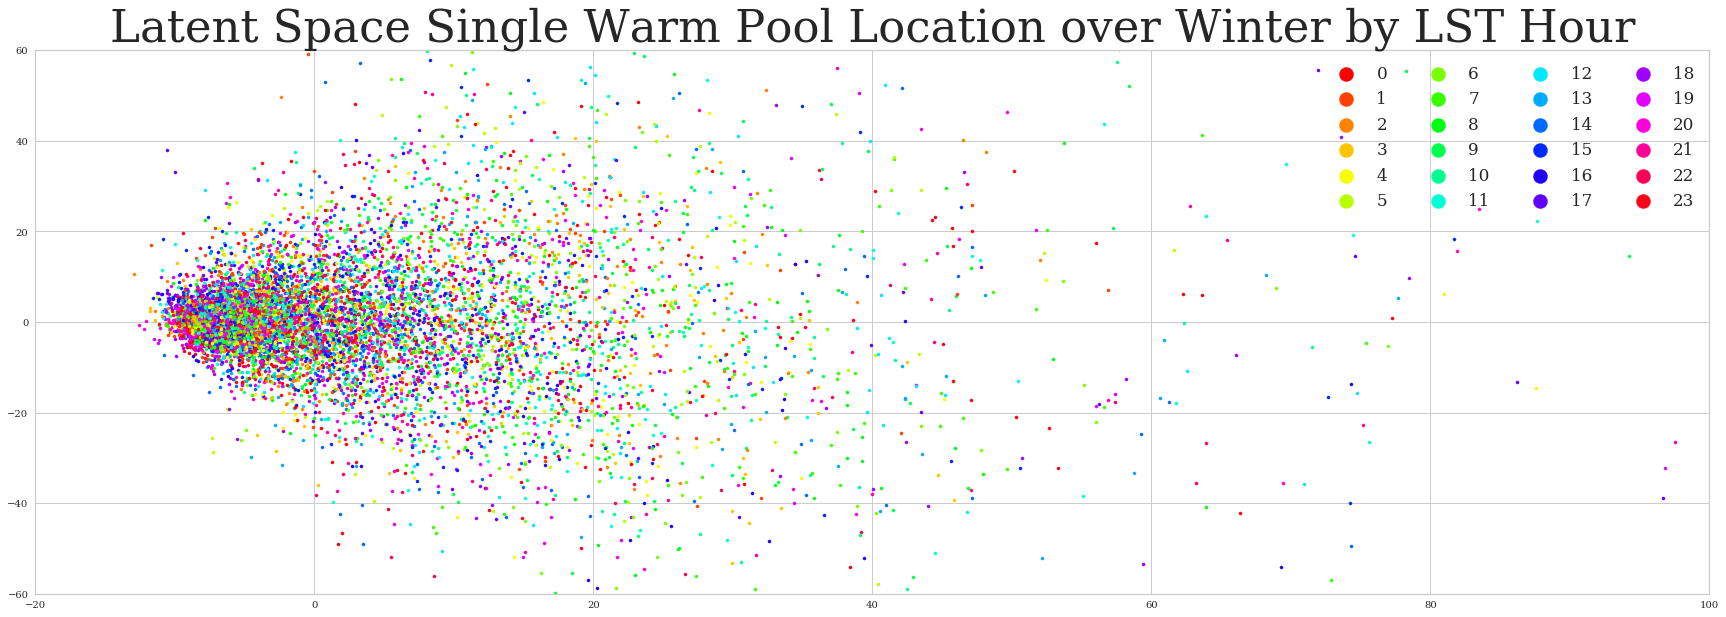

In [61]:
colors = cm.hsv(np.linspace(0, 1, 24))
fig, ax = plt.subplots(figsize=(30, 10))
ax.set_xlim(-30, 100)
ax.set_ylim(-60,60)
obs = []
for i in range(len(warm_pool_z_test_tsne)):
    if i %1000 == 0:
        print(i)
    if int(warm_pool_labels[i]) not in obs:
        obs.append(int(warm_pool_labels[i]))
        ax.scatter(x=warm_pool_z_test_tsne[i, 0], y=warm_pool_z_test_tsne[i, 1], c=colors[int(warm_pool_labels[i])], s=10.0, label = str(int(warm_pool_labels[i])))
    else:
        ax.scatter(x=warm_pool_z_test_tsne[i, 0], y=warm_pool_z_test_tsne[i, 1], c=colors[int(warm_pool_labels[i])], s=10.0)
        

lgnd = ax.legend(loc="best", ncol=4, fontsize=fz*0.75)
for handle in lgnd.legendHandles:
    handle.set_sizes([200.0])
    
    
ax.set_xlim(-20, 100)
ax.set_ylim(-60,60)
ax.set_title("Latent Space Single Warm Pool Location over Winter by LST Hour", fontsize=fz*2)

(-60, 60)

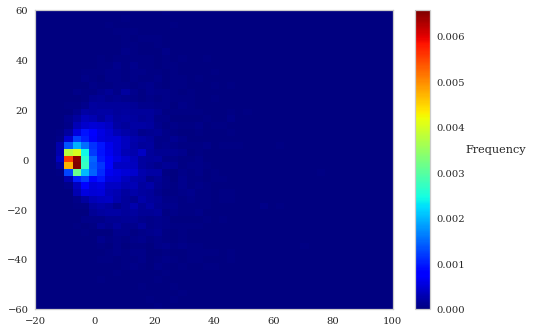

In [62]:
fig, ax = plt.subplots()    
cb = ax.hist2d(warm_pool_z_test_tsne[:,0], warm_pool_z_test_tsne[:,1], bins=(100, 100), cmap=plt.cm.jet, density=True)
cbar = fig.colorbar(cb[3], ax=ax)
cbar.set_label(label="Frequency", rotation="horizontal", fontsize=fz*0.5, labelpad=30, y = 0.55)
ax.set_xlim(-20, 100)
ax.set_ylim(-60,60)

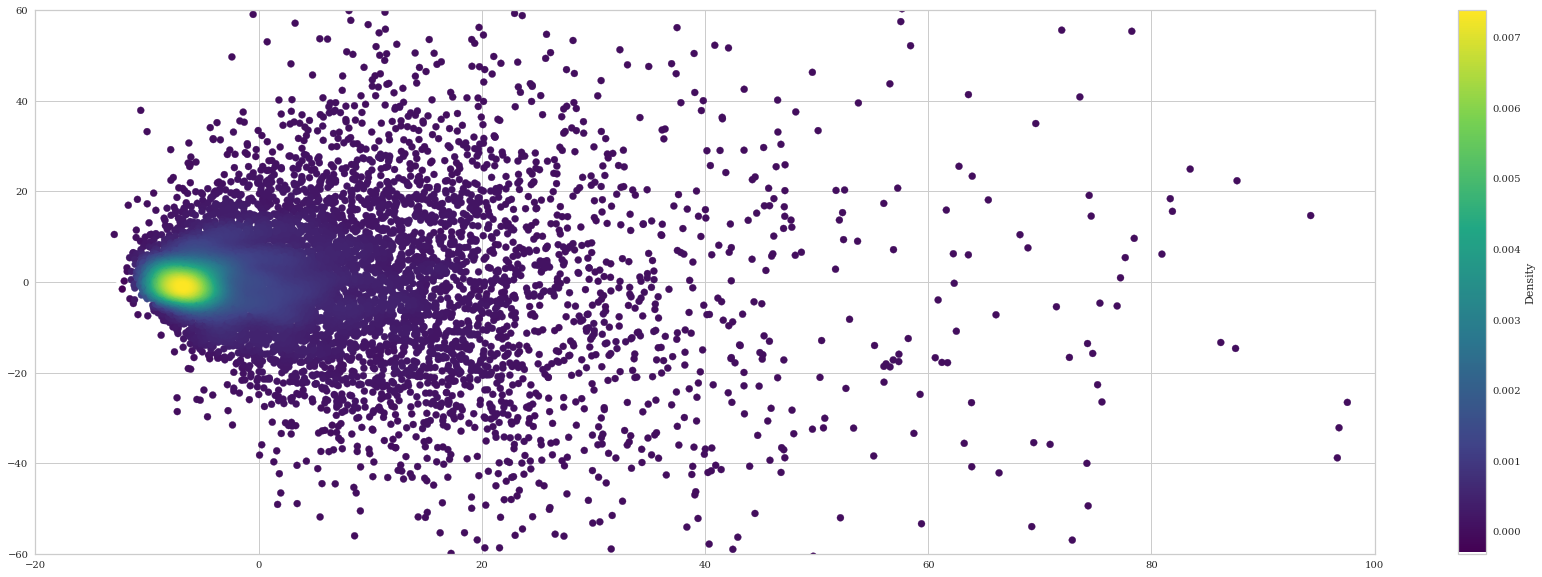

In [63]:
x = warm_pool_z_test_tsne[:,0]
y = warm_pool_z_test_tsne[:,1]
fig, ax = plt.subplots(figsize=(30,10)) 
data , x_e, y_e = np.histogram2d( x, y, bins = [100,100],  density=True)
z = interpn( ( 0.5*(x_e[1:] + x_e[:-1]) , 0.5*(y_e[1:]+y_e[:-1]) ) , data , np.vstack([x,y]).T , method = "splinef2d", bounds_error = False)

#To be sure to plot all data
z[np.where(np.isnan(z))] = 0.0

# Sort the points by density, so that the densest points are plotted last

idx = z.argsort()
x, y, z = x[idx], y[idx], z[idx]

ax.scatter( x, y, c=z, cmap=white_viridis)
ax.set_xlim(-20, 100)
ax.set_ylim(-60,60)
norm = Normalize(vmin = np.min(z), vmax = np.max(z))
cbar = fig.colorbar(cm.ScalarMappable(norm = norm, cmap=white_viridis), ax=ax)
cbar.ax.set_ylabel('Density')
print(" ")